In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv("C:\\Users\\jeetg\\code\\crime analyser\\Sample Crime Dataset - Sheet1.csv")

In [7]:
df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,5741943,HN549294,8/25/07 9:22,074XX N ROGERS AVE,560,ASSAULT,SIMPLE,OTHER,False,False,...,49.0,1.0,08A,NaN,NaN,2007,8/17/15 15:03,NaN,NaN,NaN
1,25953,JE240540,5/24/21 15:06,020XX N LARAMIE AVE,110,HOMICIDE,FIRST DEGREE MURDER,STREET,True,False,...,36.0,19.0,01A,1141387.0,1913179.0,2021,11/18/23 15:39,41.917838,-87.755969,"(41.917838056, -87.755968972)"
2,26038,JE279849,6/26/21 9:24,062XX N MC CORMICK RD,110,HOMICIDE,FIRST DEGREE MURDER,PARKING LOT,True,False,...,50.0,13.0,01A,1152781.0,1941458.0,2021,11/18/23 15:39,41.995219,-87.713355,"(41.995219444, -87.713354912)"
3,13279676,JG507211,11/9/23 7:30,019XX W BYRON ST,620,BURGLARY,UNLAWFUL ENTRY,APARTMENT,False,False,...,47.0,5.0,5,1162518.0,1925906.0,2023,11/18/23 15:39,41.952345,-87.677975,"(41.952345086, -87.677975059)"
4,13274752,JG501049,11/12/23 7:59,086XX S COTTAGE GROVE AVE,454,BATTERY,"AGGRAVATED P.O. - HANDS, FISTS, FEET, NO / MIN...",SMALL RETAIL STORE,True,False,...,6.0,44.0,08B,1183071.0,1847869.0,2023,12/9/23 15:41,41.737751,-87.604856,"(41.737750767, -87.604855911)"


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    999 non-null    int64  
 1   Case Number           999 non-null    object 
 2   Date                  999 non-null    object 
 3   Block                 999 non-null    object 
 4   IUCR                  999 non-null    object 
 5   Primary Type          999 non-null    object 
 6   Description           999 non-null    object 
 7   Location Description  997 non-null    object 
 8   Arrest                999 non-null    bool   
 9   Domestic              999 non-null    bool   
 10  Beat                  999 non-null    int64  
 11  District              999 non-null    int64  
 12  Ward                  998 non-null    float64
 13  Community Area        998 non-null    float64
 14  FBI Code              999 non-null    object 
 15  X Coordinate          9

In [10]:
df.isnull().sum()

ID                       0
Case Number              0
Date                     0
Block                    0
IUCR                     0
Primary Type             0
Description              0
Location Description     2
Arrest                   0
Domestic                 0
Beat                     0
District                 0
Ward                     1
Community Area           1
FBI Code                 0
X Coordinate            20
Y Coordinate            20
Year                     0
Updated On               0
Latitude                20
Longitude               20
Location                20
dtype: int64

In [11]:
# Fill missing values with the mode
fill_mode_columns = [
    'Location Description', 'Ward', 'Community Area', 'X Coordinate', 
    'Y Coordinate', 'Latitude', 'Longitude', 'Location'
]
for col in fill_mode_columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

C:\Users\jeetg\AppData\Local\Temp\ipykernel_21848\3470259017.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    999 non-null    int64  
 1   Case Number           999 non-null    object 
 2   Date                  999 non-null    object 
 3   Block                 999 non-null    object 
 4   IUCR                  999 non-null    object 
 5   Primary Type          999 non-null    object 
 6   Description           999 non-null    object 
 7   Location Description  999 non-null    object 
 8   Arrest                999 non-null    bool   
 9   Domestic              999 non-null    bool   
 10  Beat                  999 non-null    int64  
 11  District              999 non-null    int64  
 12  Ward                  999 non-null    float64
 13  Community Area        999 non-null    float64
 14  FBI Code              999 non-null    object 
 15  X Coordinate          9

In [13]:
import os
os.chdir("C:\\Users\\jeetg\\code\\crime analyser")

In [14]:
df.to_csv('cleaned_dataset.csv', index=False)

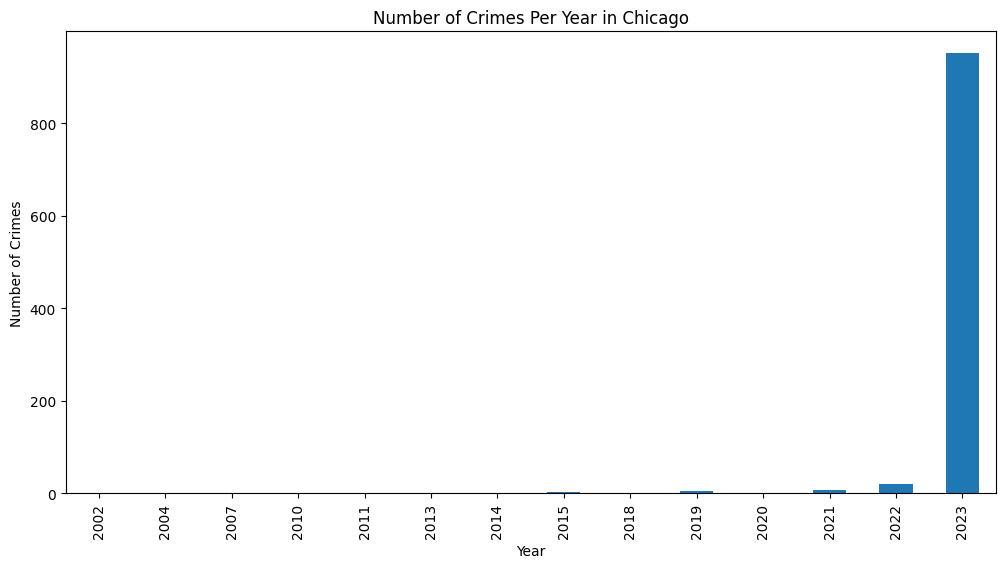

In [15]:
# Temporal Analysis - Crime Trends Over Time
crime_trends = df.groupby('Year').size()
plt.figure(figsize=(12, 6))
crime_trends.plot(kind='bar')
plt.title('Number of Crimes Per Year in Chicago')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.show()

C:\Users\jeetg\AppData\Local\Temp\ipykernel_21848\3647164684.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Hour'] = pd.to_datetime(df['Date']).dt.hour


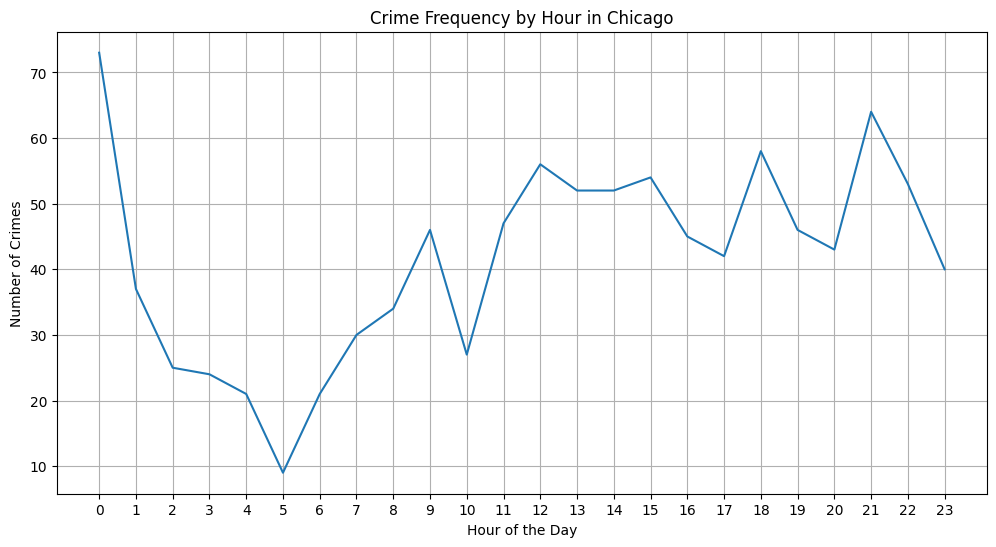

In [16]:
# Peak Crime Hours
df['Hour'] = pd.to_datetime(df['Date']).dt.hour
peak_hours = df.groupby('Hour').size()
plt.figure(figsize=(12, 6))
peak_hours.plot(kind='line')
plt.title('Crime Frequency by Hour in Chicago')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Crimes')
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()